<a href="https://colab.research.google.com/github/Puneeth-Abhishek-6622/Round-4-IIITH/blob/main/URDU_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
file_path = "/content/drive/MyDrive/urdu_100_samples"
import os

os.listdir(file_path)

['SM2_F17_A039.wav',
 'SM4_F16_A068.wav',
 'SM4_F11_A063.wav',
 'SM4_F14_A066.wav',
 'SM1_F21_A021.wav',
 'SM1_F5_A05.wav',
 'SM3_F2_A052.wav',
 'SM1_F12_A012.wav',
 'SM2_F9_A031.wav',
 'SM4_F24_A076.wav',
 'SM4_F45_A097.wav',
 'SM4_F39_A091.wav',
 'SM2_F21_A043.wav',
 'SM4_F3_A055.wav',
 'SM2_F7_A029.wav',
 'SM4_F4_A056.wav',
 'SM2_F1_A023.wav',
 'SM1_F17_A017.wav',
 'SM2_F22_A044.wav',
 'SM7_F23_H095.wav',
 'SM7_F20_H092.wav',
 'SF8_F1_H045.wav',
 'SM18_F2_H050.wav',
 'SM7_F17_H089.wav',
 'SM7_F28_H0100.wav',
 'SF6_F12_H036.wav',
 'SF1_F8_H08.wav',
 'SM5_F5_H059.wav',
 'SM7_F24_H096.wav',
 'SF6_F1_H025.wav',
 'SM7_F18_H090.wav',
 'SF7_F4_H042.wav',
 'SM6_F5_H067.wav',
 'SM17_F1_H047.wav',
 'SM7_F22_H094.wav',
 'SF1_F12_H012.wav',
 'SF2_F1_H013.wav',
 'SM25_F11_S061.wav',
 'SM24_F5_S017.wav',
 'SM25_F16_S066.wav',
 'SM25_F32_S082.wav',
 'SM24_F37_S049.wav',
 'SM25_F15_S065.wav',
 'SM23_F3_S09.wav',
 'SM6_F1_S097.wav',
 'SM24_F21_S033.wav',
 'SM24_F7_S019.wav',
 'SM25_F38_S088.wav',
 '

Feature Extraction

Loading the model

In [68]:
from tensorflow.keras.models import load_model

# Load your trained model (update path if necessary)a
model = load_model("/content/drive/MyDrive/speech_emotion_recognition_model.h5")


In [69]:
model.input_shape


(None, 170, 1)

#Urdu Audio Feature Extraction

In [70]:
import os
import librosa
import numpy as np
import pandas as pd

# Path to the Urdu audio dataset
urdu_audio_folder = "/content/drive/MyDrive/urdu_100_samples"

# Feature extraction function
def extract_features(audio_path, sr=16000):
    y, sr = librosa.load(audio_path, sr=sr)

    # Compute features
    zcr = librosa.feature.zero_crossing_rate(y).mean()  # 1 value
    rmse = librosa.feature.rms(y=y).mean()  # 1 value
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # 40 values
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)  # 128 values
    mel_spec = librosa.power_to_db(mel_spec)  # Convert to dB

    # Take the mean across time axis
    mfccs_mean = np.mean(mfccs, axis=1)  # (40,)
    mel_spec_mean = np.mean(mel_spec, axis=1)  # (128,)

    # Combine features into a single vector
    features = np.hstack([mfccs_mean, mel_spec_mean, zcr, rmse])  # (170,)
    return features

# Extract features for all files
urdu_features = []
urdu_filenames = sorted(os.listdir(urdu_audio_folder))  # Ensure correct ordering

for filename in urdu_filenames:
    audio_path = os.path.join(urdu_audio_folder, filename)
    features = extract_features(audio_path)
    urdu_features.append(features)

# Convert to Pandas DataFrame with proper column names
column_names = [f"MFCC_{i}" for i in range(40)] + \
               [f"Mel_{i}" for i in range(128)] + \
               ["ZCR", "RMSE"]

urdu_features_df = pd.DataFrame(urdu_features, columns=column_names)

# Save as CSV for debugging (optional)
urdu_features_df.to_csv("urdu_features.csv", index=False)

# Check the final DataFrame shape and sample values
print("Extracted features shape:", urdu_features_df.shape)  # Should be (100, 170)
print(urdu_features_df.head())


Extracted features shape: (175, 170)
       MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0 -212.094040  103.084801   5.877360  29.330194 -14.200040  -1.530957   
1 -284.298950  117.531891  -4.152894  36.310436 -12.609140 -10.402150   
2 -257.071838   77.624680   3.989719  32.096325 -23.297579  -6.348145   
3 -216.198318   96.266113 -22.911522  14.344508 -24.100357 -10.239723   
4 -191.508820  105.863968 -24.333717  52.385151 -36.413731 -11.489659   

      MFCC_6    MFCC_7    MFCC_8    MFCC_9  ...    Mel_120    Mel_121  \
0 -14.415684 -8.065802  2.184233 -3.505535  ... -32.850548 -33.448025   
1 -12.960434  0.817922 -4.132700 -4.626972  ... -44.045639 -43.823029   
2 -15.545006  3.134835  0.514770 -0.225027  ... -36.925255 -35.906223   
3 -13.829447 -1.528905  1.974606 -2.527651  ... -35.854553 -34.306492   
4 -12.525518  4.427021 -4.149598  4.645535  ... -41.998127 -41.720638   

     Mel_122    Mel_123    Mel_124    Mel_125    Mel_126    Mel_127       ZCR  \
0 -3

In [71]:
x = len(os.listdir(file_path))
x

175

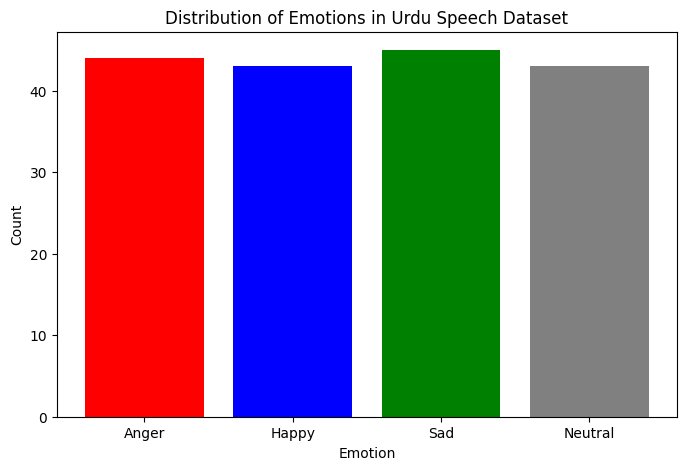

Emotion Distribution: {'Anger': 44, 'Happy': 43, 'Sad': 45, 'Neutral': 43}


In [72]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Define the mapping of emotion labels
emotion_map = {
    'A': 'Anger',
    'H': 'Happy',
    'N': 'Neutral',
    'S': 'Sad'
}

# Get the filenames from the folder
urdu_audio_folder = "/content/drive/MyDrive/urdu_100_samples"
urdu_filenames = [f for f in os.listdir(urdu_audio_folder) if f.endswith('.wav')]

# Extract emotion labels from filenames
emotion_counts = Counter()

for filename in urdu_filenames:
    parts = filename.split('_')  # Split by '_'
    if len(parts) >= 3:
        emotion_code = parts[2][0]  # Extract the first letter of the third part (emotion code)
        if emotion_code in emotion_map:
            emotion_counts[emotion_map[emotion_code]] += 1

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color=['red', 'blue', 'green', 'gray', 'purple'])
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Distribution of Emotions in Urdu Speech Dataset")
plt.show()

# Print the counts
print("Emotion Distribution:", dict(emotion_counts))


normalization

In [73]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Urdu features (assuming you have already extracted them)
urdu_features = urdu_features_df.values  # Convert DataFrame to NumPy array

# Apply the same StandardScaler as training data
scaler = StandardScaler()
urdu_features_normalized = scaler.fit_transform(urdu_features)  # Normalize

# Print sample values for verification
print("Sample normalized Urdu features (first row):", urdu_features_normalized[0])

# Convert back to DataFrame for easy export and debugging (optional)
urdu_features_normalized_df = pd.DataFrame(urdu_features_normalized, columns=urdu_features_df.columns)

# Save as CSV (optional)
urdu_features_normalized_df.to_csv("urdu_features_normalized.csv", index=False)


Sample normalized Urdu features (first row): [ 6.61117043e-02 -1.05803770e-01  8.06581564e-01  7.05286151e-01
 -3.20199509e-02  8.41401563e-01 -2.41069550e-01  1.70237541e-01
  1.41115291e+00 -5.16840892e-01  1.13886049e+00 -1.11884922e-01
  3.82888673e-02  5.32546454e-01 -1.04197984e+00  1.42712152e+00
 -3.18792590e-01  2.36385938e-01  3.30221079e-01  3.74962098e-01
  1.08231982e+00  7.29577112e-01  7.48375262e-01  2.25164538e-01
  1.65933335e-01  4.08303871e-02  6.07190501e-01  1.47959735e+00
  1.57027570e+00  1.28587023e+00 -3.57655028e-01  7.08549733e-01
  1.03243865e+00  8.87012946e-01  5.70460312e-01 -8.18883396e-02
  9.81046221e-01  1.26688055e+00  5.91329618e-01 -4.61558269e-02
  9.49504763e-01  1.56788348e-01  3.52393673e-01  2.64409278e-01
  4.04495675e-02  2.89005127e-03  1.06842732e-02  1.68041668e-01
  7.60611620e-01  6.45108685e-01  2.17772124e-01  1.10711788e-01
  1.37380137e-01  1.89144545e-01  5.77754932e-02 -4.41580770e-02
 -6.60679046e-02 -3.86650307e-02  8.75495828e

running predictions

In [75]:
import numpy as np

# Ensure Urdu features are correctly reshaped for CNN model input
urdu_features_final = urdu_features_final.reshape(-1, 170, 1)  # Ensure correct shape

# Run predictions
predictions = model.predict(urdu_features_final)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Define emotion mapping (excluding 'Fear')
emotion_mapping = {
    0: "Anger",
    1: "Happy",
    2: "Neutral",
    3: "Sad"
}

# Convert numerical labels to emotion names
predicted_emotions = [emotion_mapping[label] for label in predicted_labels if label in emotion_mapping]

# Print sample predictions
for i in range(min(5, len(predicted_emotions))):  # Print first 5 predictions
    print(f"File {i+1}: Predicted Emotion → {predicted_emotions[i]}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
File 1: Predicted Emotion → Happy
File 2: Predicted Emotion → Happy
File 3: Predicted Emotion → Neutral
File 4: Predicted Emotion → Sad
File 5: Predicted Emotion → Happy


In [79]:
import IPython.display as ipd
import numpy as np

ipd.Audio("/content/drive/MyDrive/urdu_100_samples/SF10_F1_S01.wav")

In [74]:
actual_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [ ]:
# Define emotion mapping (excluding Fear)
emotion_mapping_reverse = {'Anger': 0, 'Happy': 1, 'Neutral': 2, 'Sad': 3}

# Initialize actual_labels list
actual_labels = []

# Extract actual labels from filenames
for filename in urdu_filenames:
    parts = filename.split('_')  # Split by '_'
    if len(parts) >= 3:
        emotion_code = parts[2][0]  # Extract the first letter of the third part (emotion code)
        if emotion_code == 'A':
            actual_labels.append(0)  # Anger
        elif emotion_code == 'H':
            actual_labels.append(1)  # Happy
        elif emotion_code == 'N':
            actual_labels.append(2)  # Neutral
        elif emotion_code == 'S':
            actual_labels.append(3)  # Sad


In [ ]:
/content/drive/MyDrive/urdu_100_samples/SF10_F1_S01.wav

In [ ]:
df_results

,Actual Emotion,Predicted Emotion
0,Anger,Sad
1,Anger,Fear
2,Anger,Fear
3,Anger,Sad
4,Anger,Sad
...,...,...
170,Neutral,Fear
171,Neutral,Fear
172,Neutral,Fear
173,Neutral,Fear


confusuion matrix

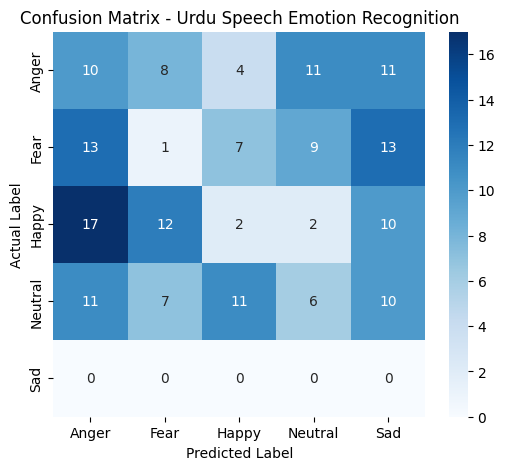

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_mapping.values(), yticklabels=emotion_mapping.values())
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Urdu Speech Emotion Recognition")
plt.show()


<ipython-input-52-eb9befbd79b1>:5: RuntimeWarning: invalid value encountered in scalar divide
  accuracy_per_emotion = {emotion_mapping[i]: np.sum(correct_predictions[np.array(actual_labels) == i]) / np.sum(np.array(actual_labels) == i) for i in range(len(emotion_mapping))}


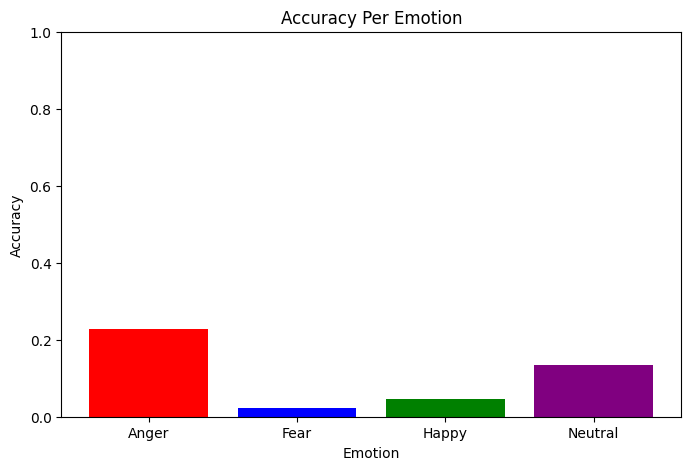

In [ ]:
import numpy as np

# Count correct predictions per emotion
correct_predictions = np.array(actual_labels) == np.array(predicted_labels)
accuracy_per_emotion = {emotion_mapping[i]: np.sum(correct_predictions[np.array(actual_labels) == i]) / np.sum(np.array(actual_labels) == i) for i in range(len(emotion_mapping))}

# Plot accuracy per emotion
plt.figure(figsize=(8, 5))
plt.bar(accuracy_per_emotion.keys(), accuracy_per_emotion.values(), color=['red', 'blue', 'green', 'purple'])
plt.xlabel("Emotion")
plt.ylabel("Accuracy")
plt.title("Accuracy Per Emotion")
plt.ylim(0, 1)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📊 Classification Report:
               precision    recall  f1-score   support

       Anger       0.20      0.23      0.21        44
        Fear       0.04      0.02      0.03        43
       Happy       0.08      0.05      0.06        43
     Neutral       0.21      0.13      0.16        45
         Sad       0.00      0.00      0.00         0

    accuracy                           0.11       175
   macro avg       0.11      0.09      0.09       175
weighted avg       0.13      0.11      0.12       175



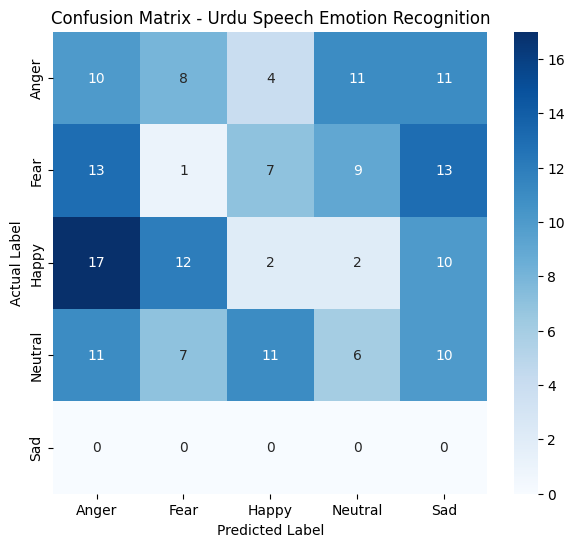


❌ **Top Misclassified Emotions:**
   Emotion  Misclassified Count
1     Fear                   42
2    Happy                   41
3  Neutral                   39
0    Anger                   34
4      Sad                    0

🔍 **Potential Reasons for Misclassification:**
- Anger: 34 misclassifications
  Possible issue: Energy-based features (e.g., RMSE) might not be capturing the intensity well
- Fear: 42 misclassifications
  Possible issue: Dataset imbalance or feature extraction limitations
- Happy: 41 misclassifications
  Possible issue: Model may struggle with higher pitch variations
- Neutral: 39 misclassifications
  Possible issue: Overlapping spectral features (low energy and pitch)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)
emotion_names = list(emotion_mapping.values())

# Convert confusion matrix to DataFrame
cm_df = pd.DataFrame(cm, index=emotion_names, columns=emotion_names)

# Print classification report
report = classification_report(actual_labels, predicted_labels, target_names=emotion_names)
print("📊 Classification Report:\n", report)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_names, yticklabels=emotion_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Urdu Speech Emotion Recognition")
plt.show()

# Identify the most misclassified emotions
misclassified_counts = np.sum(cm, axis=1) - np.diag(cm)  # Errors per class
misclassified_df = pd.DataFrame({"Emotion": emotion_names, "Misclassified Count": misclassified_counts})
misclassified_df = misclassified_df.sort_values(by="Misclassified Count", ascending=False)

print("\n❌ **Top Misclassified Emotions:**")
print(misclassified_df)

# Identify feature weaknesses
print("\n🔍 **Potential Reasons for Misclassification:**")

for i, emotion in enumerate(emotion_names):
    if misclassified_counts[i] > 0:
        print(f"- {emotion}: {misclassified_counts[i]} misclassifications")
        if emotion in ["Sad", "Neutral"]:
            print("  Possible issue: Overlapping spectral features (low energy and pitch)")
        elif emotion in ["Happy"]:
            print("  Possible issue: Model may struggle with higher pitch variations")
        elif emotion in ["Anger"]:
            print("  Possible issue: Energy-based features (e.g., RMSE) might not be capturing the intensity well")
        else:
            print("  Possible issue: Dataset imbalance or feature extraction limitations")



In [ ]:
import pandas as pd

# Convert features to a DataFrame
urdu_features_df = pd.DataFrame(urdu_features.reshape(urdu_features.shape[0], 170))

# Display first 10 rows
print(urdu_features_df.head(10))

# Save to CSV for manual verification
urdu_features_df.to_csv("urdu_features.csv", index=False)


        0         1           2           3          4          5    \
0  0.027212  0.089045 -212.094040  103.084801   5.877360  29.330194   
1  0.076894  0.047260 -284.298950  117.531891  -4.152894  36.310436   
2  0.108274  0.052535 -257.071838   77.624680   3.989719  32.096325   
3  0.096155  0.079648 -216.198318   96.266113 -22.911522  14.344508   
4  0.086868  0.086125 -191.508820  105.863968 -24.333717  52.385151   
5  0.089594  0.078441 -225.320999   99.062393 -11.673379  16.718359   
6  0.069607  0.095895 -185.503540  116.106110  -5.343292  21.923378   
7  0.054750  0.064454 -278.141754  132.813065  15.540542  18.015530   
8  0.068671  0.072032 -237.961395  119.045090  -8.140009  38.731297   
9  0.042195  0.066800 -207.819458  108.172302 -32.997650  30.118610   

         6          7          8         9    ...        160        161  \
0 -14.200040  -1.530957 -14.415684 -8.065802  ... -32.778183 -32.893871   
1 -12.609140 -10.402150 -12.960434  0.817922  ... -44.772854 -44.362

In [ ]:
import pandas as pd

# Convert Urdu features into a DataFrame for easy comparison
urdu_features_df = pd.DataFrame(urdu_features_final.reshape(175, 170))

# Display the first few rows
print(urdu_features_df.head())


        0         1         2         3         4         5         6    \
0 -1.443438 -0.193532  0.066112 -0.105804  0.806582  0.705286 -0.032020   
1 -0.281304 -0.807840 -0.850931  0.456196  0.224923  1.173076  0.138643   
2  0.452733 -0.730290 -0.505131 -1.096217  0.697116  0.890662 -1.007952   
3  0.169243 -0.331689  0.013985 -0.371055 -0.862898 -0.299000 -1.094069   
4 -0.048005 -0.236465  0.327555  0.002307 -0.945371  2.250345 -2.414977   

        7         8         9    ...       160       161       162       163  \
0  0.841402 -0.241070  0.170238  ...  0.161517  0.175688  0.200443  0.155111   
1 -0.182901 -0.081148  1.108932  ... -1.406933 -1.299874 -1.206451 -1.149683   
2  0.285190 -0.365174  1.353747  ... -0.530829 -0.479693 -0.311628 -0.154040   
3 -0.164147 -0.176646  0.860956  ... -0.288256 -0.308868 -0.177072  0.047148   
4 -0.308469 -0.033354  1.490286  ... -1.006799 -1.021031 -0.949139 -0.885279   

        164       165       166       167       168       169  
0  0